# Import needed packages

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Load the datasets
sales_data = pd.read_csv('../data/snp_dld_2024_transactions.csv', low_memory=False)
rentals_data = pd.read_csv('../data/snp_dld_2024_rents.csv', low_memory=False)

In [73]:
# Display basic info
print("Sales Data Info:")
print(sales_data.info())
print("\nRentals Data Info:")
print(rentals_data.info())

Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162806 entries, 0 to 162805
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_number      162806 non-null  object 
 1   transaction_datetime    162806 non-null  object 
 2   transaction_type_en     162806 non-null  object 
 3   transaction_type_id     162806 non-null  int64  
 4   transaction_subtype_en  162806 non-null  object 
 5   transaction_subtype_id  162806 non-null  int64  
 6   registration_type_en    162806 non-null  object 
 7   is_freehold_text        162806 non-null  object 
 8   property_usage_en       162806 non-null  object 
 9   property_usage_id       162806 non-null  int64  
 10  amount                  162806 non-null  float64
 11  total_buyer             162806 non-null  int64  
 12  total_seller            162806 non-null  int64  
 13  transaction_size_sqm    162146 non-null  float64
 14  pro

# Eliminate Obviously Not Needed Columns
## Objective
The goal of this step is to clean the datasets by removing columns that are:

1. Irrelevant to the analysis or modeling.
2. Redundant due to duplication with other columns.
3. Contain very few non-null values, providing negligible information.
4. Metadata or identifiers that don't contribute to predictions.
## Rentals Data (`rentals_data`)

### **Columns Removed**

#### **Identifiers**
- **`ejari_contract_number`**: This is an ID column with no predictive value.
- **`land_property_id`**: A redundant identifier that doesn't contribute to the analysis.
- **`entry_id`**: Another metadata-related identifier.

#### **Metadata**
- **`meta_ts`**: A metadata timestamp irrelevant for modeling.

#### **Columns with Very Few Non-Null Values**
- **`master_project_en`, `master_project_ar`**: These columns have very few non-null values and provide negligible information.

#### **Duplicate Columns**
- **`property_type_ar`**: Duplicate of `property_type_en`.
- **`property_subtype_ar`**: Duplicate of `property_subtype_en`.
- **`property_usage_ar`**: Duplicate of `property_usage_en`.
- **`project_name_ar`**: Duplicate of `project_name_en`.
- **`area_ar`**: Duplicate of `area_en`.
- **`nearest_landmark_ar`**: Duplicate of `nearest_landmark_en`.
- **`nearest_metro_ar`**: Duplicate of `nearest_metro_en`.
- **`nearest_mall_ar`**: Duplicate of `nearest_mall_en`.


In [74]:
# %%
# List of columns to drop from sales_data
columns_to_drop_sales = [
    'transaction_number',  # ID column
    'entry_id',            # Metadata
    'meta_ts',             # Metadata timestamp
    'master_project_en',   # Very few non-null values
    'master_project_ar',   # Very few non-null values
    'property_type_ar',    # Duplicate of property_type_en
    'property_subtype_ar', # Duplicate of property_subtype_en
    'rooms_ar',            # Duplicate of rooms_en
    'project_name_ar',     # Duplicate of project_name_en
    'area_ar',             # Duplicate of area_en
    'nearest_landmark_ar', # Duplicate of nearest_landmark_en
    'nearest_metro_ar',    # Duplicate of nearest_metro_en
    'nearest_mall_ar'      # Duplicate of nearest_mall_en
]

# Drop columns from sales_data
sales_data.drop(columns=columns_to_drop_sales, inplace=True, errors='ignore')

# List of columns to drop from rentals_data
columns_to_drop_rentals = [
    'ejari_contract_number', # ID column
    'land_property_id',      # Redundant ID column
    'entry_id',              # Metadata
    'meta_ts',               # Metadata timestamp
    'master_project_en',     # Very few non-null values
    'master_project_ar',     # Very few non-null values
    'property_type_ar',      # Duplicate of property_type_en
    'property_subtype_ar',   # Duplicate of property_subtype_en
    'property_usage_ar',     # Duplicate of property_usage_en
    'project_name_ar',       # Duplicate of project_name_en
    'area_ar',               # Duplicate of area_en
    'nearest_landmark_ar',   # Duplicate of nearest_landmark_en
    'nearest_metro_ar',      # Duplicate of nearest_metro_en
    'nearest_mall_ar'        # Duplicate of nearest_mall_en
]

# Drop columns from rentals_data
rentals_data.drop(columns=columns_to_drop_rentals, inplace=True, errors='ignore')

# Verify remaining columns
print("Remaining columns in sales_data:")
print(sales_data.columns)
print("\nRemaining columns in rentals_data:")
print(rentals_data.columns)


Remaining columns in sales_data:
Index(['transaction_datetime', 'transaction_type_en', 'transaction_type_id',
       'transaction_subtype_en', 'transaction_subtype_id',
       'registration_type_en', 'is_freehold_text', 'property_usage_en',
       'property_usage_id', 'amount', 'total_buyer', 'total_seller',
       'transaction_size_sqm', 'property_size_sqm', 'parcel_id', 'property_id',
       'is_offplan', 'is_freehold', 'property_type_en', 'property_type_id',
       'property_subtype_en', 'property_subtype_id', 'building_age',
       'rooms_en', 'parking', 'project_name_en', 'area_en', 'area_id',
       'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en',
       'req_from', 'req_to'],
      dtype='object')

Remaining columns in rentals_data:
Index(['registration_date', 'contract_start_date', 'contract_end_date',
       'version_number', 'version_text', 'contract_amount', 'annual_amount',
       'is_freehold', 'is_freehold_text', 'property_size_sqm', 'parcel_id',
       'prop

## Step: Identify and Document Constant Columns

### **Objective**
To identify columns in the dataset that:
1. Have only one unique value (constant).
2. Are entirely composed of missing values (`NaN`).

Such columns provide no variability and are irrelevant for analysis or modeling.

---

### **Function Explanation**
The function `find_constant_columns_with_details`:
1. **Inputs**:
   - `df`: The DataFrame to analyze.
   - `dataset_name`: A string to identify which dataset is being processed (e.g., `"Sales Data"`).

2. **Logic**:
   - Iterates through all columns in the DataFrame.
   - For each column:
     - Checks if the column has only one unique value using `len(unique_values) == 1`.
     - Checks if the column contains only `NaN` values using `df[col].isnull().all()`.
   - If either condition is true, the column is flagged as constant and added to the `constant_columns` list.

3. **Outputs**:
   - Prints detailed information for each constant column, including:
     - The column name.
     - The number of unique values.
     - The unique values themselves.
   - Returns a list of all constant columns.

4. **Example Usage**:
   ```python
   sales_constant_columns = find_constant_columns_with_details(sales_data, "Sales Data")


In [75]:
def find_constant_columns_with_details(df, dataset_name):
    """
    Identifies columns in a DataFrame that have only one unique value or are entirely NaN.
    Prints detailed results for the given dataset.
    """
    constant_columns = []
    for col in df.columns:
        unique_values = df[col].unique()
        if len(unique_values) == 1 or df[col].isnull().all():
            constant_columns.append(col)
            print(f"{col}: {len(unique_values)} unique values, Values: {unique_values}")
    if constant_columns:
        print(f"\nConstant columns in {dataset_name}: {constant_columns}")
    else:
        print(f"\nNo constant columns found in {dataset_name}.")
    return constant_columns

sales_constant_columns = find_constant_columns_with_details(sales_data, "Sales Data")



transaction_subtype_id: 1 unique values, Values: [0]
property_id: 1 unique values, Values: [0]
property_type_id: 1 unique values, Values: [0]
property_subtype_id: 1 unique values, Values: [0]
building_age: 1 unique values, Values: [0]
area_id: 1 unique values, Values: [0]

Constant columns in Sales Data: ['transaction_subtype_id', 'property_id', 'property_type_id', 'property_subtype_id', 'building_age', 'area_id']


In [76]:
rentals_constant_columns = find_constant_columns_with_details(rentals_data, "Rentals Data")


property_id: 1 unique values, Values: [0]
property_usage_id: 1 unique values, Values: [0]
area_id: 1 unique values, Values: [0]
ejari_property_type_id: 1 unique values, Values: [0]
ejari_property_sub_type_id: 1 unique values, Values: [0]

Constant columns in Rentals Data: ['property_id', 'property_usage_id', 'area_id', 'ejari_property_type_id', 'ejari_property_sub_type_id']


In [77]:
# Drop constant columns from sales_data
sales_data.drop(columns=sales_constant_columns, inplace=True)
print(f"Dropped constant columns from Sales Data: {sales_constant_columns}")

# Drop constant columns from rentals_data
rentals_data.drop(columns=rentals_constant_columns, inplace=True)
print(f"Dropped constant columns from Rentals Data: {rentals_constant_columns}")


Dropped constant columns from Sales Data: ['transaction_subtype_id', 'property_id', 'property_type_id', 'property_subtype_id', 'building_age', 'area_id']
Dropped constant columns from Rentals Data: ['property_id', 'property_usage_id', 'area_id', 'ejari_property_type_id', 'ejari_property_sub_type_id']


In [78]:
# Count the number of columns in sales_data
sales_columns_count = sales_data.shape[1]
print(f"Number of columns in Sales Data: {sales_columns_count}")

# Count the number of columns in rentals_data
rentals_columns_count = rentals_data.shape[1]
print(f"Number of columns in Rentals Data: {rentals_columns_count}")


Number of columns in Sales Data: 27
Number of columns in Rentals Data: 24


## Step: Identifying and Handling Overlapping Columns

### **Objective**
To identify pairs of columns in the dataset where one column uniquely determines the values of another. Overlapping columns indicate redundancy, as they provide the same information in different formats (e.g., textual vs. numerical encoding).

---

### **Approach**
1. **Identify Overlapping Columns**:
   - Use a function to systematically check for pairs of columns where one column's values uniquely map to another column's values.
   - This ensures no important information is lost during cleanup.

2. **Handle Redundancy**:
   - Retain the most concise and modeling-suitable column in each overlapping pair.
   - Remove the redundant column to simplify the dataset.

3. **Prepare the Dataset**:
   - Focus on keeping only meaningful and unique features, improving efficiency and reducing noise in the dataset.

---

### **Why Handle Overlapping Columns?**
- **Reduce Redundancy**: Eliminates unnecessary duplication of information.
- **Improve Model Efficiency**: Keeps the dataset compact and avoids overfitting.
- **Streamline Feature Engineering**: Focus on deriving insights from unique and meaningful columns.

---

### **Expected Outcome**
- A cleaner and more efficient dataset with minimal redundancy.
- Retention of only the most informative columns from each overlapping pair.

---


In [79]:
# Duplicate of transaction_type_id
columns_to_drop = ['transaction_type_en']

sales_data.drop(columns=columns_to_drop, inplace=True)



In [80]:
# Duplicate of property_usage_id

columns_to_drop = ['property_usage_en']

sales_data.drop(columns=columns_to_drop, inplace=True)

In [81]:
print("Updated Sales Data:")
print(sales_data.info())

Updated Sales Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162806 entries, 0 to 162805
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_datetime    162806 non-null  object 
 1   transaction_type_id     162806 non-null  int64  
 2   transaction_subtype_en  162806 non-null  object 
 3   registration_type_en    162806 non-null  object 
 4   is_freehold_text        162806 non-null  object 
 5   property_usage_id       162806 non-null  int64  
 6   amount                  162806 non-null  float64
 7   total_buyer             162806 non-null  int64  
 8   total_seller            162806 non-null  int64  
 9   transaction_size_sqm    162146 non-null  float64
 10  property_size_sqm       162806 non-null  float64
 11  parcel_id               60451 non-null   float64
 12  is_offplan              162806 non-null  object 
 13  is_freehold             162122 non-null  object 
 14  

In [82]:
sales_data.columns

Index(['transaction_datetime', 'transaction_type_id', 'transaction_subtype_en',
       'registration_type_en', 'is_freehold_text', 'property_usage_id',
       'amount', 'total_buyer', 'total_seller', 'transaction_size_sqm',
       'property_size_sqm', 'parcel_id', 'is_offplan', 'is_freehold',
       'property_type_en', 'property_subtype_en', 'rooms_en', 'parking',
       'project_name_en', 'area_en', 'nearest_landmark_en', 'nearest_metro_en',
       'nearest_mall_en', 'req_from', 'req_to'],
      dtype='object')

In [83]:
def find_all_overlapping_columns(df):
    """
    Find all overlapping column pairs in a DataFrame where one column's values 
    uniquely map to another column's values and validate that the mappings align.

    Parameters:
        df (DataFrame): The dataset to analyze.

    Returns:
        List[Tuple[str, str]]: List of tuples with all overlapping column pairs.
    """
    overlapping_pairs = []
    for reference_column in df.columns:
        for col in df.columns:
            if col != reference_column:
                # Check if the reference column uniquely maps to the current column
                mapping_valid = (
                    df.groupby(reference_column)[col].nunique().nunique() == 1
                )
                # Additional check: Ensure columns have identical values for valid mappings
                if mapping_valid and (df[reference_column].astype(str) == df[col].astype(str)).all():
                    overlapping_pairs.append((reference_column, col))
    return overlapping_pairs

# Apply the function to sales_data
sales_overlapping_pairs = find_all_overlapping_columns(sales_data)

# Print the results
print("Validated Overlapping Column Pairs in Sales Data:")
print(sales_overlapping_pairs)



Validated Overlapping Column Pairs in Sales Data:
[]


In [84]:
# Function to display the head of overlapping column pairs
def print_overlapping_pairs_head(df, overlapping_pairs):
    """
    Print the first few rows (head) of overlapping column pairs for inspection.

    Parameters:
        df (DataFrame): The dataset to analyze.
        overlapping_pairs (List[Tuple[str, str]]): List of column pairs to inspect.
    """
    for col1, col2 in overlapping_pairs:
        print(f"Head of {col1} and {col2}:")
        print(df[[col1, col2]].head())
        print("\n")

# Apply the overlapping analysis function to sales_data
sales_overlapping_pairs = find_all_overlapping_columns(sales_data)

# Print the head of each overlapping column pair
print_overlapping_pairs_head(sales_data, sales_overlapping_pairs)


In [85]:
print("Updated Sales Data:")
print(rentals_data.info())

Updated Sales Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747408 entries, 0 to 747407
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   registration_date    747408 non-null  object 
 1   contract_start_date  747408 non-null  object 
 2   contract_end_date    747408 non-null  object 
 3   version_number       747408 non-null  int64  
 4   version_text         747408 non-null  object 
 5   contract_amount      747408 non-null  float64
 6   annual_amount        747394 non-null  float64
 7   is_freehold          747408 non-null  object 
 8   is_freehold_text     747408 non-null  object 
 9   property_size_sqm    747408 non-null  float64
 10  parcel_id            516983 non-null  float64
 11  property_type_en     747408 non-null  object 
 12  property_subtype_en  744863 non-null  object 
 13  property_usage_en    744564 non-null  object 
 14  total_properties     747408 non-null  int64  
 1

In [86]:
# Apply the overlapping analysis function to sales_data
rentals_overlapping_pairs = find_all_overlapping_columns(rentals_data)

# Print the head of each overlapping column pair
print_overlapping_pairs_head(rentals_data, rentals_overlapping_pairs)

In [87]:
# Inspect column data types
print(sales_data.dtypes)



transaction_datetime       object
transaction_type_id         int64
transaction_subtype_en     object
registration_type_en       object
is_freehold_text           object
property_usage_id           int64
amount                    float64
total_buyer                 int64
total_seller                int64
transaction_size_sqm      float64
property_size_sqm         float64
parcel_id                 float64
is_offplan                 object
is_freehold                object
property_type_en           object
property_subtype_en        object
rooms_en                   object
parking                    object
project_name_en            object
area_en                    object
nearest_landmark_en        object
nearest_metro_en           object
nearest_mall_en            object
req_from                   object
req_to                     object
dtype: object


In [88]:
# Inspect column data types
print(rentals_data.dtypes)

registration_date       object
contract_start_date     object
contract_end_date       object
version_number           int64
version_text            object
contract_amount        float64
annual_amount          float64
is_freehold             object
is_freehold_text        object
property_size_sqm      float64
parcel_id              float64
property_type_en        object
property_subtype_en     object
property_usage_en       object
total_properties         int64
rooms                  float64
parking                float64
project_name_en         object
area_en                 object
nearest_landmark_en     object
nearest_metro_en        object
nearest_mall_en         object
req_from                object
req_to                  object
dtype: object


# Handle dates
- Convert to datetime
- Extract features
- drop the original dates

In [89]:
# Identify date columns
sales_date_columns = ['transaction_datetime', 'req_from', 'req_to']
rentals_date_columns = ['registration_date', 'contract_start_date', 'contract_end_date', 'req_from', 'req_to']
# Function to handle dates: convert to datetime and extract features
def handle_date_columns(df, date_columns):
    """
    Handles date columns by converting them to datetime and extracting features.
    
    Parameters:
        df (DataFrame): The DataFrame to process.
        date_columns (list): List of column names to handle.
    
    Returns:
        DataFrame: Updated DataFrame with extracted date features.
    """
    for col in date_columns:
        # Convert to datetime
        df[col] = pd.to_datetime(df[col], errors='coerce')
        
        # Extract features
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day
        df[f"{col}_weekday"] = df[col].dt.weekday  # 0 = Monday, 6 = Sunday
        df[f"{col}_dayofyear"] = df[col].dt.dayofyear
    
    # Optionally drop the original date columns
    df.drop(columns=date_columns, inplace=True)
    
    return df

# Apply the function to sales_data and rentals_data
sales_data = handle_date_columns(sales_data, sales_date_columns)
rentals_data = handle_date_columns(rentals_data, rentals_date_columns)

# Display results
print("Sales Data after date handling:")
print(sales_data.info())

print("\nRentals Data after date handling:")
print(rentals_data.info())

Sales Data after date handling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162806 entries, 0 to 162805
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   transaction_type_id             162806 non-null  int64  
 1   transaction_subtype_en          162806 non-null  object 
 2   registration_type_en            162806 non-null  object 
 3   is_freehold_text                162806 non-null  object 
 4   property_usage_id               162806 non-null  int64  
 5   amount                          162806 non-null  float64
 6   total_buyer                     162806 non-null  int64  
 7   total_seller                    162806 non-null  int64  
 8   transaction_size_sqm            162146 non-null  float64
 9   property_size_sqm               162806 non-null  float64
 10  parcel_id                       60451 non-null   float64
 11  is_offplan                      162806 non-nul

# Handle Boolean and Categorical date

In [90]:
def classify_columns_exclude_processed(df, exclude_columns=[]):
    """
    Classifies columns in a DataFrame as boolean or categorical, excluding specified columns.
    
    Parameters:
        df (DataFrame): The DataFrame to analyze.
        exclude_columns (list): List of columns to exclude from analysis.
    
    Returns:
        Dict: Dictionary with lists of boolean and categorical columns.
    """
    boolean_columns = []
    categorical_columns = []
    
    for col in df.columns:
        if col in exclude_columns:
            continue  # Skip excluded columns
        
        unique_values = df[col].nunique()
        dtype = df[col].dtype
        
        # Boolean detection: bool type or exactly two unique values
        if dtype == 'bool' or (unique_values == 2 and dtype in ['object', 'int64', 'float64']):
            boolean_columns.append(col)
        # Categorical detection: object or category type, or limited unique values
        elif dtype in ['object', 'category'] or unique_values <= 20:
            categorical_columns.append(col)
    
    return {
        "boolean_columns": boolean_columns,
        "categorical_columns": categorical_columns
    }

# Example Usage
# Exclude columns already processed, like datetime-derived features
exclude_columns_sales = [col for col in sales_data.columns if col.endswith(('_year', '_month', '_day', '_weekday', '_dayofyear'))]
exclude_columns_rentals = [col for col in rentals_data.columns if col.endswith(('_year', '_month', '_day', '_weekday', '_dayofyear'))]

sales_column_classes = classify_columns_exclude_processed(sales_data, exclude_columns=exclude_columns_sales)
rentals_column_classes = classify_columns_exclude_processed(rentals_data, exclude_columns=exclude_columns_rentals)

print("Sales Data Column Classes (excluding processed features):", sales_column_classes)
print("Rentals Data Column Classes (excluding processed features):", rentals_column_classes)



Sales Data Column Classes (excluding processed features): {'boolean_columns': ['registration_type_en', 'is_freehold_text', 'property_usage_id', 'is_offplan', 'is_freehold'], 'categorical_columns': ['transaction_type_id', 'transaction_subtype_en', 'total_buyer', 'property_type_en', 'property_subtype_en', 'rooms_en', 'parking', 'project_name_en', 'area_en', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en']}
Rentals Data Column Classes (excluding processed features): {'boolean_columns': ['version_text', 'is_freehold', 'is_freehold_text'], 'categorical_columns': ['property_type_en', 'property_subtype_en', 'property_usage_en', 'rooms', 'project_name_en', 'area_en', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en']}


In [91]:
# Updated Rentals Column Classes
rentals_column_classes['boolean_columns'].remove('version_text')
rentals_column_classes['categorical_columns'].append('version_text')

# Function to process boolean columns (unchanged)
def process_boolean_columns(df, boolean_columns):
    """
    Processes boolean columns by mapping their values to 0 and 1.
    """
    for col in boolean_columns:
        df[col] = df[col].map({'t': 1, 'f': 0, 'True': 1, 'False': 0, True: 1, False: 0})
    return df

# Function to process categorical columns (unchanged)
from sklearn.preprocessing import LabelEncoder

def process_categorical_columns(df, categorical_columns, encoding='label'):
    """
    Processes categorical columns by encoding their values.
    """
    if encoding == 'label':
        # Label Encoding
        for col in categorical_columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    elif encoding == 'one-hot':
        # One-Hot Encoding
        df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    
    return df

# Process boolean columns for Sales Data
sales_data = process_boolean_columns(sales_data, sales_column_classes['boolean_columns'])

# Process boolean columns for Rentals Data
rentals_data = process_boolean_columns(rentals_data, rentals_column_classes['boolean_columns'])

# Process categorical columns for Sales Data
sales_data = process_categorical_columns(sales_data, sales_column_classes['categorical_columns'], encoding='label')

# Process categorical columns for Rentals Data
rentals_data = process_categorical_columns(rentals_data, rentals_column_classes['categorical_columns'], encoding='label')

# Display results
print("Processed Sales Data:")
print(sales_data.info())

print("\nProcessed Rentals Data:")
print(rentals_data.info())


Processed Sales Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162806 entries, 0 to 162805
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   transaction_type_id             162806 non-null  int64  
 1   transaction_subtype_en          162806 non-null  int64  
 2   registration_type_en            0 non-null       float64
 3   is_freehold_text                0 non-null       float64
 4   property_usage_id               157968 non-null  float64
 5   amount                          162806 non-null  float64
 6   total_buyer                     162806 non-null  int64  
 7   total_seller                    162806 non-null  int64  
 8   transaction_size_sqm            162146 non-null  float64
 9   property_size_sqm               162806 non-null  float64
 10  parcel_id                       60451 non-null   float64
 11  is_offplan                      162806 non-null  int64  

# Handle Missing values. 

In [92]:
# Display the number and percentage of missing values for Sales Data
print("Missing Values in Sales Data:")
missing_sales = sales_data.isnull().sum().to_frame(name="Missing Count")
missing_sales["Percentage"] = (missing_sales["Missing Count"] / len(sales_data)) * 100
print(missing_sales[missing_sales["Missing Count"] > 0])

# Display the number and percentage of missing values for Rentals Data
print("\nMissing Values in Rentals Data:")
missing_rentals = rentals_data.isnull().sum().to_frame(name="Missing Count")
missing_rentals["Percentage"] = (missing_rentals["Missing Count"] / len(rentals_data)) * 100
print(missing_rentals[missing_rentals["Missing Count"] > 0])


Missing Values in Sales Data:
                      Missing Count  Percentage
registration_type_en         162806  100.000000
is_freehold_text             162806  100.000000
property_usage_id              4838    2.971635
transaction_size_sqm            660    0.405390
parcel_id                    102355   62.869305
is_freehold                     684    0.420132

Missing Values in Rentals Data:
                  Missing Count  Percentage
annual_amount                14    0.001873
is_freehold_text         747408  100.000000
parcel_id                230425   30.829881
parking                  731686   97.896464


We can drop is_freehold_text from both datasets since we already have is_freehold as a boolean.


In [93]:
# Drop 'is_freehold_text' from Sales Data and Rentals Data
sales_data.drop(columns=['is_freehold_text'], inplace=True)
rentals_data.drop(columns=['is_freehold_text'], inplace=True)

# invistigate parcel_id and see if it valuable for modeling
Step 1: Analyze the Distribution of parcel_id
Understanding the distribution and uniqueness of parcel_id is crucial to decide its utility.

In [94]:
# Count missing values and unique values in 'parcel_id'
print("Sales Data:")
print(f"Missing values in 'parcel_id': {sales_data['parcel_id'].isnull().sum()}")
print(f"Unique values in 'parcel_id': {sales_data['parcel_id'].nunique()}")
print(f"Total rows in Sales Data: {len(sales_data)}")

print("\nRentals Data:")
print(f"Missing values in 'parcel_id': {rentals_data['parcel_id'].isnull().sum()}")
print(f"Unique values in 'parcel_id': {rentals_data['parcel_id'].nunique()}")
print(f"Total rows in Rentals Data: {len(rentals_data)}")


Sales Data:
Missing values in 'parcel_id': 102355
Unique values in 'parcel_id': 4433
Total rows in Sales Data: 162806

Rentals Data:
Missing values in 'parcel_id': 230425
Unique values in 'parcel_id': 22625
Total rows in Rentals Data: 747408


In [95]:
# Sales Data: Correlation with 'amount'
if 'parcel_id' in sales_data.columns:
    sales_correlation = sales_data[['parcel_id', 'amount']].dropna().corr()
    print("\nCorrelation of 'parcel_id' with 'amount' in Sales Data:")
    print(sales_correlation)

# Rentals Data: Correlation with 'annual_amount'
if 'parcel_id' in rentals_data.columns:
    rentals_correlation = rentals_data[['parcel_id', 'annual_amount']].dropna().corr()
    print("\nCorrelation of 'parcel_id' with 'annual_amount' in Rentals Data:")
    print(rentals_correlation)



Correlation of 'parcel_id' with 'amount' in Sales Data:
           parcel_id    amount
parcel_id   1.000000 -0.089935
amount     -0.089935  1.000000

Correlation of 'parcel_id' with 'annual_amount' in Rentals Data:
               parcel_id  annual_amount
parcel_id        1.00000        0.01251
annual_amount    0.01251        1.00000


## Correlation in Sales Data
The correlation between parcel_id and amount is -0.089935:
This is a very weak negative correlation.
It indicates that parcel_id has almost no linear relationship with the target variable (amount) in the sales dataset.
## Correlation in Rentals Data
The correlation between parcel_id and annual_amount is 0.01251:
This is an extremely weak positive correlation, suggesting no meaningful relationship between parcel_id and annual_amount in the rentals dataset.
The best decision is to drop them. 

In [96]:
# Drop 'parcel_id' from both datasets
sales_data.drop(columns=['parcel_id'], inplace=True)
rentals_data.drop(columns=['parcel_id'], inplace=True)

The parking column in the rentals dataset has 97.9% missing values. So, we drop it.

In [97]:
# Drop 'parking' from the rentals dataset
rentals_data.drop(columns=['parking'], inplace=True)

In [98]:
# Check unique values and missing counts before processing
print("Unique values in 'registration_type_en':", sales_data['registration_type_en'].unique())
print("Missing values in 'registration_type_en':", sales_data['registration_type_en'].isnull().sum())

print("\nUnique values in 'is_freehold_text':", sales_data['is_freehold_text'].unique())
print("Missing values in 'is_freehold_text':", sales_data['is_freehold_text'].isnull().sum())


Unique values in 'registration_type_en': [nan]
Missing values in 'registration_type_en': 162806


KeyError: 'is_freehold_text'

There is probably a mistake when processing the registration_type_en, So, I will load it again and process it indivisually. 

In [ ]:
sales_data_original = pd.read_csv('../data/snp_dld_2024_transactions.csv', low_memory=False)

In [ ]:
# Verify the column of interest
print("Original Unique Values in 'registration_type_en':")
print(sales_data_original['registration_type_en'].unique())

Original Unique Values in 'registration_type_en':
['Off-Plan' 'Ready']


In [ ]:
# Check unique values and missing values
print("Unique values in 'registration_type_en':")
print(sales_data_original['registration_type_en'].unique())

print("\nMissing values in 'registration_type_en':")
print(sales_data_original['registration_type_en'].isnull().sum())


Unique values in 'registration_type_en':
['Off-Plan' 'Ready']

Missing values in 'registration_type_en':
0


In [ ]:
# Binary Encoding
sales_data_original['registration_type_en_encoded'] = sales_data_original['registration_type_en'].map({'Off-Plan': 0, 'Ready': 1})

# Verify encoding
print("Binary Encoded 'registration_type_en':")
print(sales_data_original[['registration_type_en', 'registration_type_en_encoded']].head())


Binary Encoded 'registration_type_en':
  registration_type_en  registration_type_en_encoded
0             Off-Plan                             0
1             Off-Plan                             0
2             Off-Plan                             0
3             Off-Plan                             0
4             Off-Plan                             0


In [ ]:
# Update the 'registration_type_en' in sales_data with the encoded column from sales_data_original
sales_data['registration_type_en'] = sales_data_original['registration_type_en_encoded']

# Verify the updated column
print("Updated 'registration_type_en' in sales_data:")
print(sales_data[['registration_type_en']].head())


Updated 'registration_type_en' in sales_data:
   registration_type_en
0                     0
1                     0
2                     0
3                     0
4                     0


In [ ]:
# Display the number and percentage of missing values for Sales Data
print("Missing Values in Sales Data:")
missing_sales = sales_data.isnull().sum().to_frame(name="Missing Count")
missing_sales["Percentage"] = (missing_sales["Missing Count"] / len(sales_data)) * 100
print(missing_sales[missing_sales["Missing Count"] > 0])

# Display the number and percentage of missing values for Rentals Data
print("\nMissing Values in Rentals Data:")
missing_rentals = rentals_data.isnull().sum().to_frame(name="Missing Count")
missing_rentals["Percentage"] = (missing_rentals["Missing Count"] / len(rentals_data)) * 100
print(missing_rentals[missing_rentals["Missing Count"] > 0])

Missing Values in Sales Data:
                      Missing Count  Percentage
property_usage_id              4838    2.971635
transaction_size_sqm            660    0.405390
is_freehold                     684    0.420132

Missing Values in Rentals Data:
               Missing Count  Percentage
annual_amount             14    0.001873


In [ ]:
# Sales Data: Handle missing values
sales_data['property_usage_id'].fillna(sales_data['property_usage_id'].mode()[0], inplace=True)  # Fill with mode
sales_data['transaction_size_sqm'].fillna(sales_data['transaction_size_sqm'].median(), inplace=True)  # Fill with median
sales_data['is_freehold'].fillna(sales_data['is_freehold'].mode()[0], inplace=True)  # Fill with mode

# Rentals Data: Handle missing values
rentals_data['annual_amount'].fillna(rentals_data['annual_amount'].median(), inplace=True)  # Fill with median

# Verify that all missing values are handled
print("Missing Values in Sales Data After Handling:")
print(sales_data.isnull().sum())

print("\nMissing Values in Rentals Data After Handling:")
print(rentals_data.isnull().sum())


Missing Values in Sales Data After Handling:
transaction_type_id               0
transaction_subtype_en            0
registration_type_en              0
property_usage_id                 0
amount                            0
total_buyer                       0
total_seller                      0
transaction_size_sqm              0
property_size_sqm                 0
is_offplan                        0
is_freehold                       0
property_type_en                  0
property_subtype_en               0
rooms_en                          0
parking                           0
project_name_en                   0
area_en                           0
nearest_landmark_en               0
nearest_metro_en                  0
nearest_mall_en                   0
transaction_datetime_year         0
transaction_datetime_month        0
transaction_datetime_day          0
transaction_datetime_weekday      0
transaction_datetime_dayofyear    0
req_from_year                     0
req_from_month     

/tmp/ipykernel_6769/398869135.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['property_usage_id'].fillna(sales_data['property_usage_id'].mode()[0], inplace=True)  # Fill with mode
/tmp/ipykernel_6769/398869135.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

## check for constant columns again. 

In [ ]:
sales_constant_columns = find_constant_columns_with_details(sales_data, "Sales Data")
rentals_constant_columns = find_constant_columns_with_details(rentals_data, "rentals Data")
print(sales_constant_columns)
print(rentals_constant_columns)

property_usage_id: 1 unique values, Values: [1.]
transaction_datetime_year: 1 unique values, Values: [2024]
req_from_year: 1 unique values, Values: [2024]
req_from_day: 1 unique values, Values: [1]
req_to_year: 1 unique values, Values: [2024]

Constant columns in Sales Data: ['property_usage_id', 'transaction_datetime_year', 'req_from_year', 'req_from_day', 'req_to_year']
registration_date_year: 1 unique values, Values: [2024]
req_from_year: 1 unique values, Values: [2024]
req_from_day: 1 unique values, Values: [1]
req_to_year: 1 unique values, Values: [2024]

Constant columns in rentals Data: ['registration_date_year', 'req_from_year', 'req_from_day', 'req_to_year']
['property_usage_id', 'transaction_datetime_year', 'req_from_year', 'req_from_day', 'req_to_year']
['registration_date_year', 'req_from_year', 'req_from_day', 'req_to_year']


In [ ]:
# Check unique values and their counts in the original data
print("Unique values in 'property_usage_id' (sales_data_original):")
print(sales_data_original['property_usage_id'].value_counts(dropna=False))

# Check if the column is constant
if sales_data_original['property_usage_id'].nunique() == 1:
    print("\n'property_usage_id' is constant in the original dataset.")
else:
    print("\n'property_usage_id' is not constant in the original dataset.")


Unique values in 'property_usage_id' (sales_data_original):
property_usage_id
1    157968
2      4838
Name: count, dtype: int64

'property_usage_id' is not constant in the original dataset.


There must be a mistake in earlier preprocessing. So, I will handle property_usage_id seperately. 

In [ ]:
# Restore the original 'property_usage_id' column
sales_data['property_usage_id'] = sales_data_original['property_usage_id']

# Verify the unique values
print("Unique values in 'property_usage_id' after restoration:")
print(sales_data['property_usage_id'].value_counts())


Unique values in 'property_usage_id' after restoration:
property_usage_id
1    157968
2      4838
Name: count, dtype: int64


In [ ]:
# Impute missing values with the mode
sales_data['property_usage_id'] = sales_data['property_usage_id'].fillna(sales_data['property_usage_id'].mode()[0])


# Verify the missing values are handled
print("Missing values in 'property_usage_id':", sales_data['property_usage_id'].isnull().sum())


Missing values in 'property_usage_id': 0


In [ ]:
sales_data['property_usage_id'].value_counts()

property_usage_id
1    157968
2      4838
Name: count, dtype: int64

In [ ]:
sales_constant_columns = find_constant_columns_with_details(sales_data, "Sales Data")
rentals_constant_columns = find_constant_columns_with_details(rentals_data, "rentals Data")
print(sales_constant_columns)
print(rentals_constant_columns)

transaction_datetime_year: 1 unique values, Values: [2024]
req_from_year: 1 unique values, Values: [2024]
req_from_day: 1 unique values, Values: [1]
req_to_year: 1 unique values, Values: [2024]

Constant columns in Sales Data: ['transaction_datetime_year', 'req_from_year', 'req_from_day', 'req_to_year']
registration_date_year: 1 unique values, Values: [2024]
req_from_year: 1 unique values, Values: [2024]
req_from_day: 1 unique values, Values: [1]
req_to_year: 1 unique values, Values: [2024]

Constant columns in rentals Data: ['registration_date_year', 'req_from_year', 'req_from_day', 'req_to_year']
['transaction_datetime_year', 'req_from_year', 'req_from_day', 'req_to_year']
['registration_date_year', 'req_from_year', 'req_from_day', 'req_to_year']


Drop the constant fields

In [ ]:
# Define the constant columns for each dataset
sales_constant_columns = ['transaction_datetime_year', 'req_from_year', 'req_from_day', 'req_to_year']
rentals_constant_columns = ['registration_date_year', 'req_from_year', 'req_from_day', 'req_to_year']

# Drop the constant columns from the datasets
sales_data.drop(columns=sales_constant_columns, inplace=True)
rentals_data.drop(columns=rentals_constant_columns, inplace=True)

# Verify the columns have been removed
print("Sales Data Columns After Dropping Constant Columns:")
print(sales_data.columns)

print("\nRentals Data Columns After Dropping Constant Columns:")
print(rentals_data.columns)


Sales Data Columns After Dropping Constant Columns:
Index(['transaction_type_id', 'transaction_subtype_en', 'registration_type_en',
       'property_usage_id', 'amount', 'total_buyer', 'total_seller',
       'transaction_size_sqm', 'property_size_sqm', 'is_offplan',
       'is_freehold', 'property_type_en', 'property_subtype_en', 'rooms_en',
       'parking', 'project_name_en', 'area_en', 'nearest_landmark_en',
       'nearest_metro_en', 'nearest_mall_en', 'transaction_datetime_month',
       'transaction_datetime_day', 'transaction_datetime_weekday',
       'transaction_datetime_dayofyear', 'req_from_month', 'req_from_weekday',
       'req_from_dayofyear', 'req_to_month', 'req_to_day', 'req_to_weekday',
       'req_to_dayofyear'],
      dtype='object')

Rentals Data Columns After Dropping Constant Columns:
Index(['version_number', 'version_text', 'contract_amount', 'annual_amount',
       'is_freehold', 'property_size_sqm', 'property_type_en',
       'property_subtype_en', 'property_u

Save the dfs.

In [ ]:
# Save the cleaned Sales Data to a CSV file
sales_data.to_csv("cleaned_sales_data.csv", index=False)
print("Cleaned Sales Data saved as 'cleaned_sales_data.csv'.")

# Save the cleaned Rentals Data to a CSV file
rentals_data.to_csv("cleaned_rentals_data.csv", index=False)
print("Cleaned Rentals Data saved as 'cleaned_rentals_data.csv'.")


Cleaned Sales Data saved as 'cleaned_sales_data.csv'.
Cleaned Rentals Data saved as 'cleaned_rentals_data.csv'.


# EDA

In [ ]:
print(sales_data.describe())
print(rentals_data.describe())


       transaction_type_id  transaction_subtype_en  registration_type_en  \
count        162806.000000           162806.000000         162806.000000   
mean              0.253584               28.204255              0.527388   
std               0.513912                9.890908              0.499251   
min               0.000000                0.000000              0.000000   
25%               0.000000               27.000000              0.000000   
50%               0.000000               32.000000              1.000000   
75%               0.000000               34.000000              1.000000   
max               2.000000               36.000000              1.000000   

       property_usage_id        amount    total_buyer   total_seller  \
count      162806.000000  1.628060e+05  162806.000000  162806.000000   
mean            1.029716  3.275140e+06       1.205773       0.850055   
std             0.169804  2.491812e+07       1.252515       0.699373   
min             1.000000  1

In [ ]:
print(sales_data['property_type_en'].value_counts())
print(rentals_data['property_type_en'].value_counts())


property_type_en
2    125841
1     21328
0     15637
Name: count, dtype: int64
property_type_en
2    682508
3     45062
4     17205
1      2413
0       220
Name: count, dtype: int64


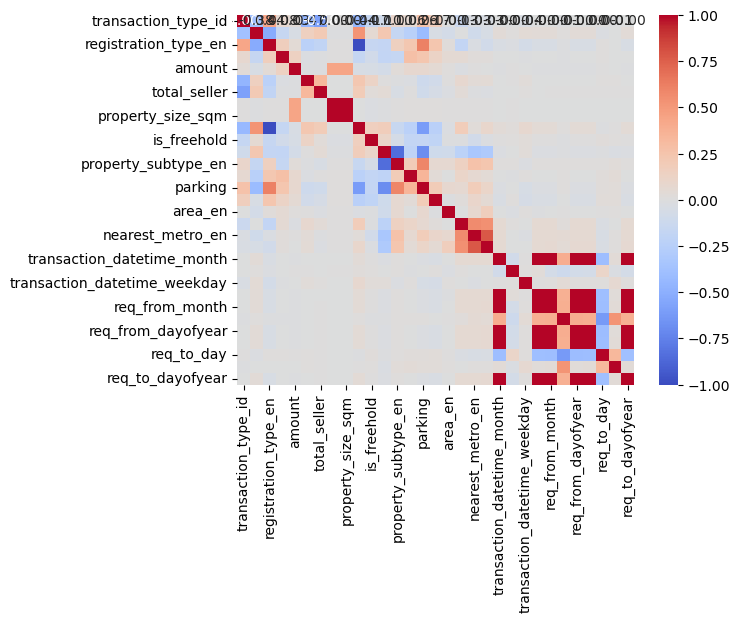

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
sns.heatmap(sales_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


## Correlation Analysis

In [ ]:
# Perform correlation analysis for numerical columns in both DataFrames

# Correlation analysis for sales_data
sales_corr = sales_data.corr(numeric_only=True)
print("Correlation Matrix for Sales Data:")
print(sales_corr)



Correlation Matrix for Sales Data:
                                transaction_type_id  transaction_subtype_en  \
transaction_type_id                        1.000000               -0.379928   
transaction_subtype_en                    -0.379928                1.000000   
registration_type_en                       0.435846               -0.524795   
property_usage_id                          0.076663               -0.157275   
amount                                     0.032139               -0.045000   
total_buyer                               -0.468070                0.151513   
total_seller                              -0.583895                0.205080   
transaction_size_sqm                       0.004075               -0.008572   
property_size_sqm                          0.004171               -0.008578   
is_offplan                                -0.435846                0.524795   
is_freehold                               -0.165465                0.060423   
property_type_en 

In [ ]:
# Correlation analysis for rentals_data
rentals_corr = rentals_data.corr(numeric_only=True)
print("\nCorrelation Matrix for Rentals Data:")
print(rentals_corr)



Correlation Matrix for Rentals Data:
                               version_number  version_text  contract_amount  \
version_number                       1.000000      0.630379        -0.001319   
version_text                         0.630379      1.000000        -0.002988   
contract_amount                     -0.001319     -0.002988         1.000000   
annual_amount                        0.008335      0.005446         0.718672   
is_freehold                         -0.156498     -0.065855        -0.040804   
property_size_sqm                   -0.000510     -0.000592        -0.000181   
property_type_en                    -0.054246     -0.077771        -0.022263   
property_subtype_en                  0.046735     -0.053012        -0.024955   
property_usage_en                    0.009510      0.133771         0.000914   
total_properties                    -0.043420     -0.018893         0.509905   
rooms                                0.021710      0.008534         0.015102   
pr

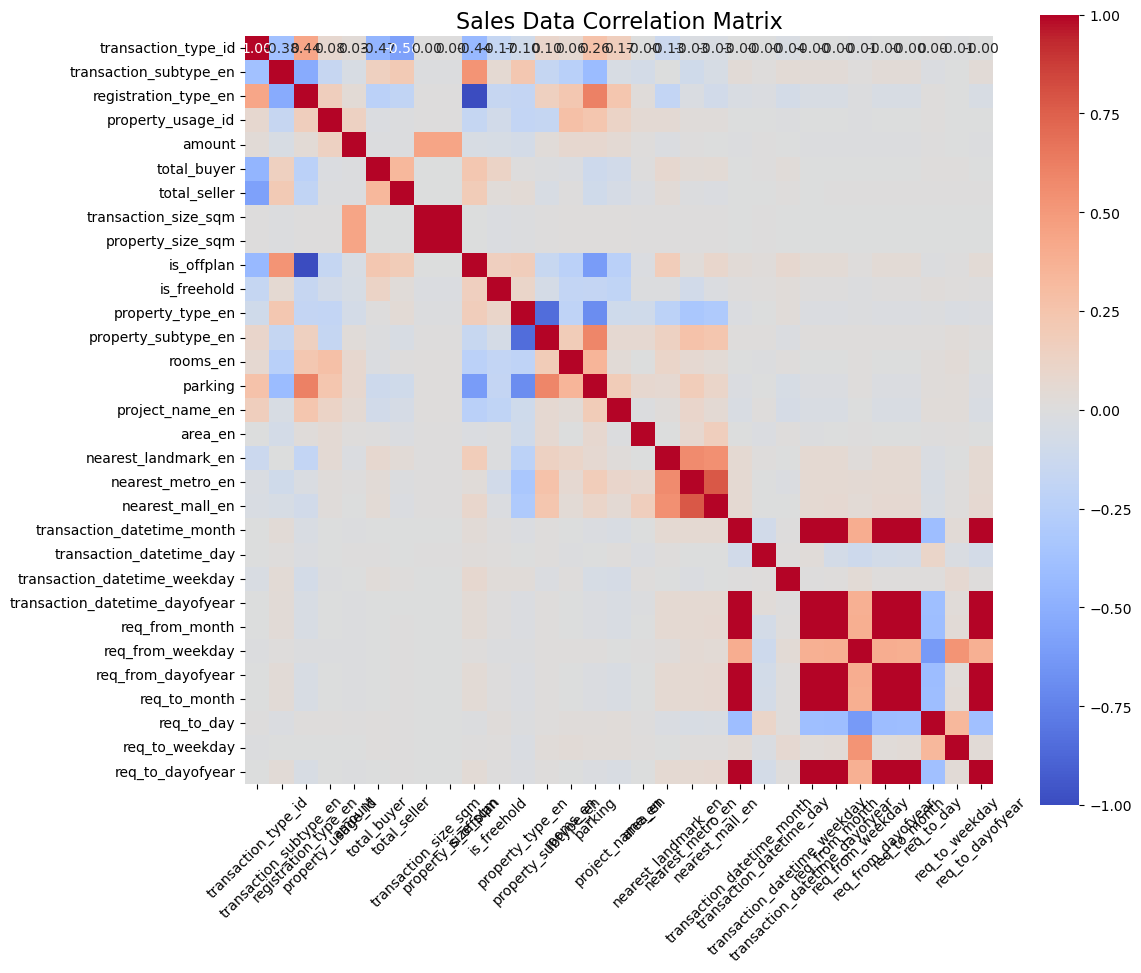

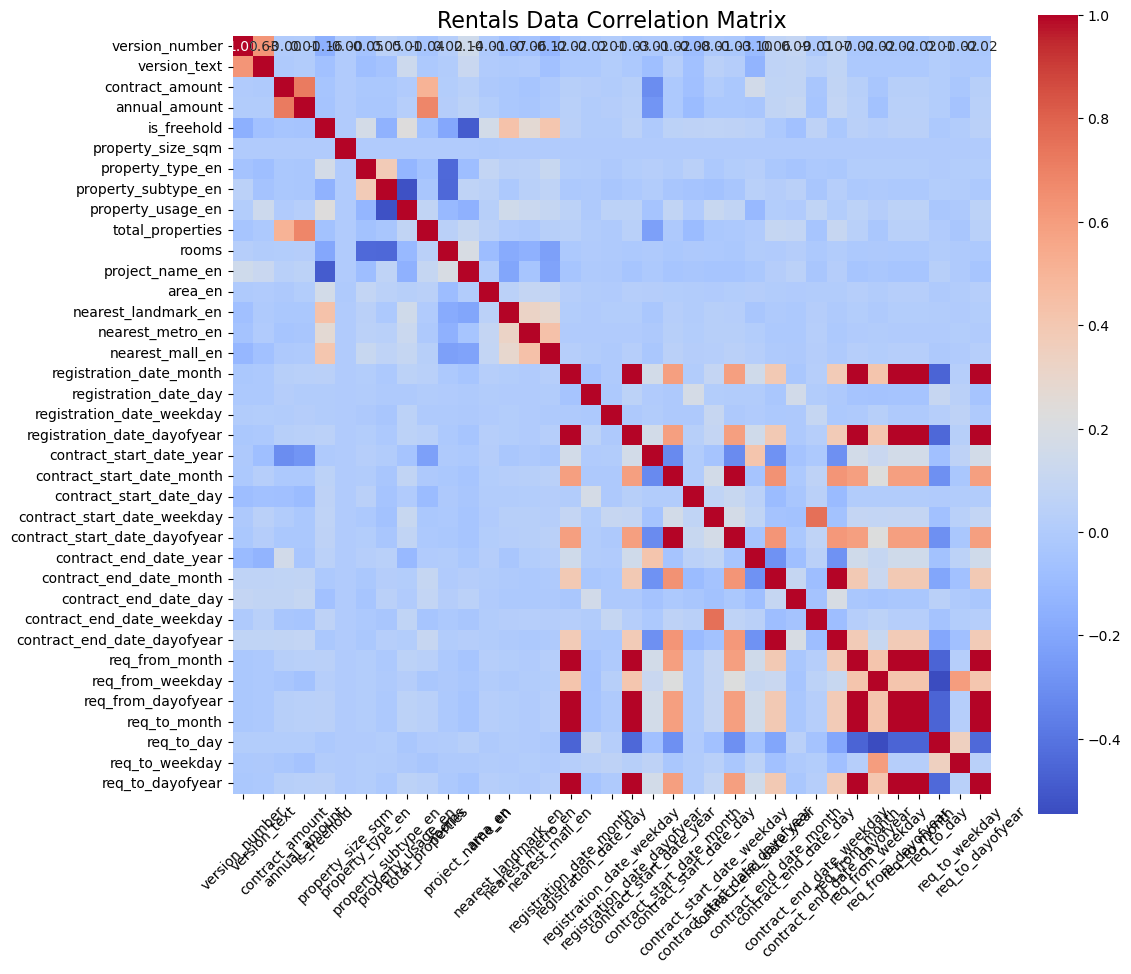

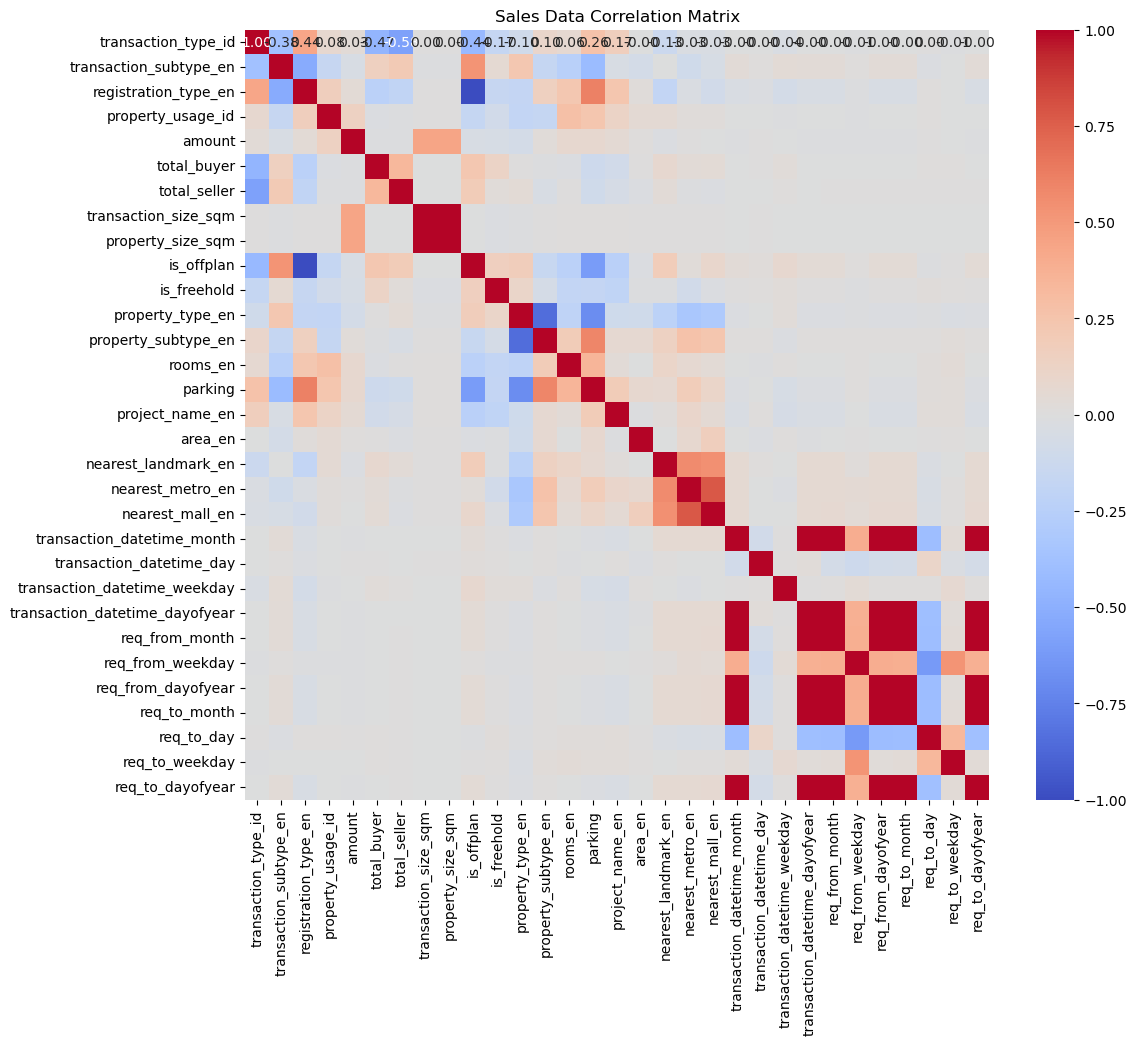

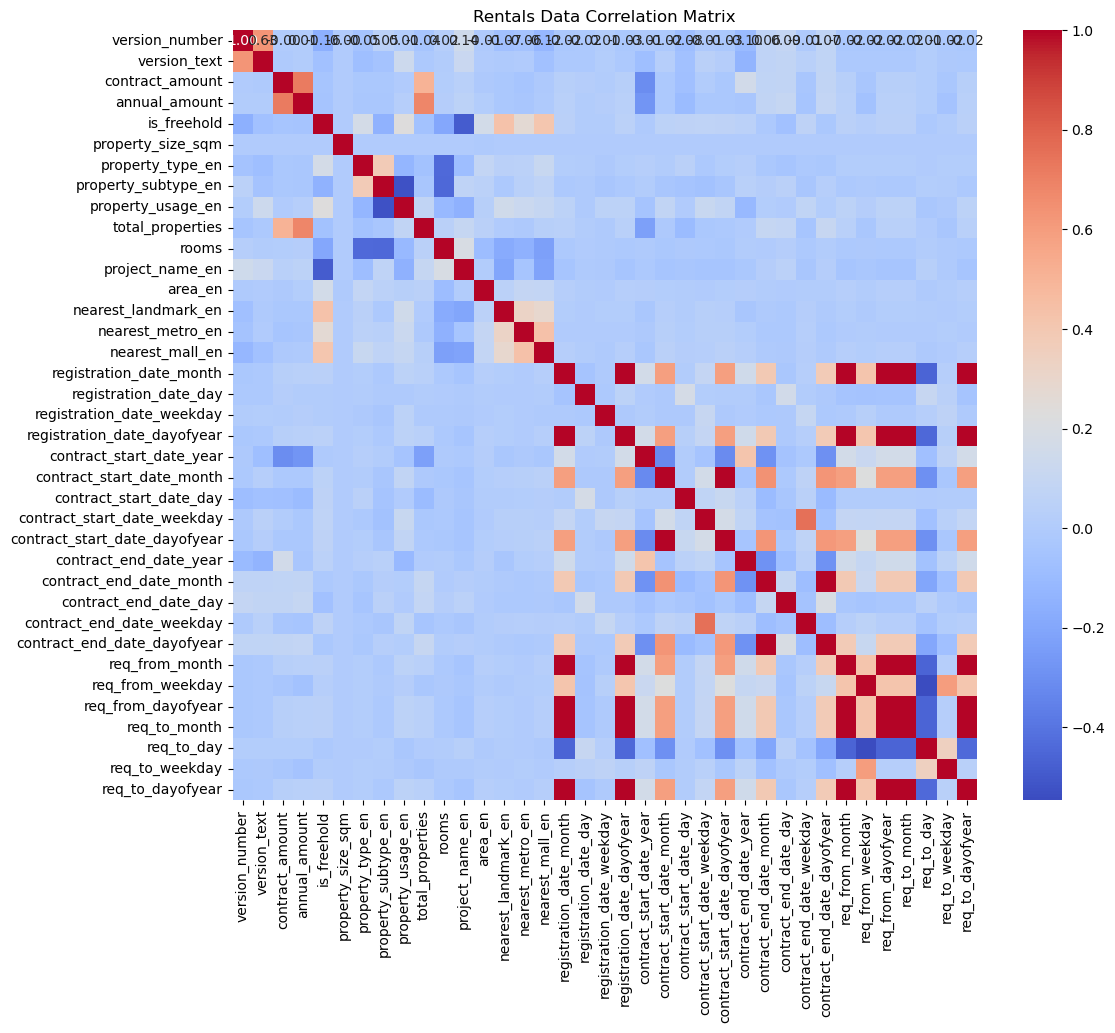

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix_with_numbers(corr_matrix, title):
    """
    Plots a correlation matrix heatmap with numbers displayed in each cell.

    Parameters:
        corr_matrix (DataFrame): Correlation matrix to visualize.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        corr_matrix, 
        annot=True, 
        fmt=".2f", 
        cmap="coolwarm", 
        cbar=True, 
        square=True, 
        annot_kws={"size": 10}  # Adjust font size of annotations
    )
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

# Visualize correlation matrices
plot_correlation_matrix_with_numbers(sales_corr, "Sales Data Correlation Matrix")
plot_correlation_matrix_with_numbers(rentals_corr, "Rentals Data Correlation Matrix")
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize correlation matrix
def plot_correlation_matrix(corr_matrix, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()

# Plot correlation matrix for sales_data
plot_correlation_matrix(sales_corr, "Sales Data Correlation Matrix")

# Plot correlation matrix for rentals_data
plot_correlation_matrix(rentals_corr, "Rentals Data Correlation Matrix")


# Numerical Columns Normalization